In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import SparsePCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import NMF
from sklearn.ensemble import RandomForestRegressor
import subprocess
from sklearn.model_selection import RandomizedSearchCV
import sys
import math
import scipy.spatial.distance
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.tree import DecisionTreeRegressor
import os
import shutil
import glob
import shap
cmap='viridis'
sys.path.insert(1, '../')
from LibHelperFuncs import *

rstate = 0
np.random.seed(0)
njob = -1
global_trees = 1000

In [2]:
raw_dat = pd.read_csv("../../Data/Graphene_Oxide_Nanoflake.csv")
dat = raw_dat.dropna(axis=1)
X = dat.iloc[:,1:-2].drop(['Shape'], axis=1)
X = scale_data(X).values
Y = raw_dat.iloc[:,-1].values

XY = np.append(X, Y.reshape(*Y.shape, 1), axis=1)
print(XY.shape)
np.savetxt("data_base.csv", XY, delimiter=',')

(776, 673)


In [3]:
rf = RandomForestRegressor(n_estimators=global_trees, n_jobs=njob, random_state=rstate)

rf.fit(X, Y)
rff = rf.feature_importances_

exp = shap.TreeExplainer(rf)
s_vals = exp.shap_values(X, approximate=True)
ov_shap = np.mean(np.abs(s_vals), axis=0)

In [4]:
cvrf = []
cvsh = []
lrange = range(5, 101, 1)

for l in lrange:
    X_r = X[:,np.argsort(rff)[::-1][:l]]

    score = cross_val_score(rf, X_r, Y, cv=5, n_jobs=njob, scoring='neg_mean_squared_error')
    cvrf.append(np.mean(np.abs(score)))
    
    X_r = X[:,np.argsort(ov_shap)[::-1][:l]]

    score = cross_val_score(rf, X_r, Y, cv=5, n_jobs=njob, scoring='neg_mean_squared_error')
    cvsh.append(np.mean(np.abs(score)))

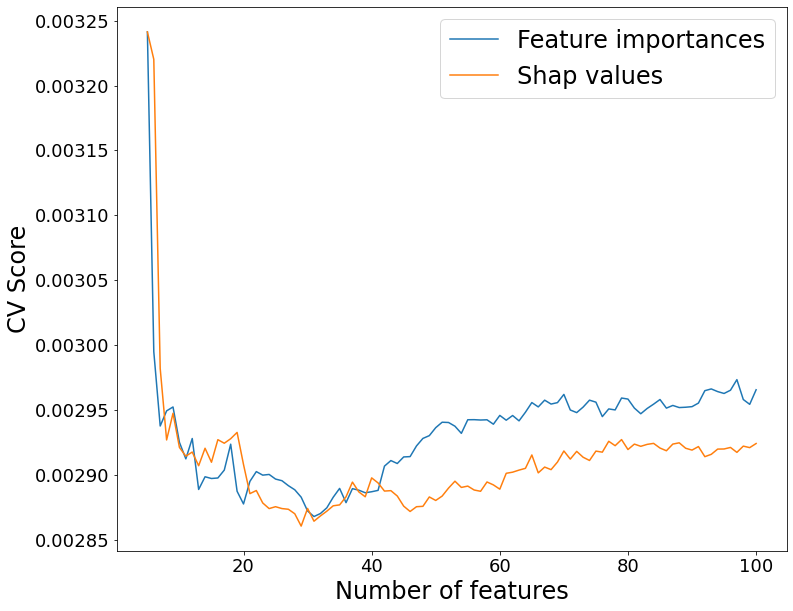

In [5]:
plt.figure(figsize=(12,10))

plt.plot(lrange, cvrf, label='Feature importances')
plt.plot(lrange, cvsh, label='Shap values')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=24)

plt.xlabel("Number of features", fontsize=24)
plt.ylabel("CV Score", fontsize=24)

plt.legend(fontsize=24)
